In [1]:
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

In [2]:
y, sr = librosa.load("whittakeri.wav", sr=44100)

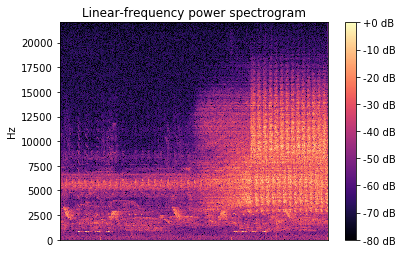

In [3]:
Y = librosa.stft(y, n_fft = 4096, hop_length = 512)
Y_dB = librosa.amplitude_to_db(Y, ref=np.max)
librosa.display.specshow(Y_dB, y_axis='linear', sr=sr, hop_length = 512)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [4]:
mag, phase = librosa.magphase(Y)

In [13]:
import pandas as pd
df=pd.read_csv('mag_espectro.csv', sep=';',header=None)

In [14]:
excel = df.values

In [15]:
excel.shape

(2049, 1502)

In [16]:
a = excel == 9000

In [17]:
b = excel != 9000

In [18]:
Y_dB[a].shape

(580,)

In [19]:
Y_dB[b].shape

(3077018,)

(array([   2.,   11.,   25.,   41.,   73.,   95.,   95.,   96.,  108.,   34.]),
 array([-23.99948883, -21.59953995, -19.19959106, -16.79964218,
        -14.3996933 , -11.99974442,  -9.59979553,  -7.19984665,
         -4.79989777,  -2.39994888,   0.        ]),
 <a list of 10 Patch objects>)

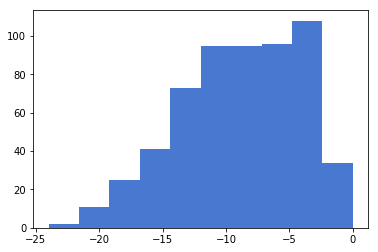

In [20]:
plt.hist(Y_dB[a], bins=10)

(array([ 328980.,  653976.,  401512.,  337316.,  415888.,  383333.,
         307767.,  203124.,   43749.,    1373.]),
 array([-80.        , -72.14414749, -64.28829498, -56.43244247,
        -48.57658997, -40.72073746, -32.86488495, -25.00903244,
        -17.15317993,  -9.29732742,  -1.44147491]),
 <a list of 10 Patch objects>)

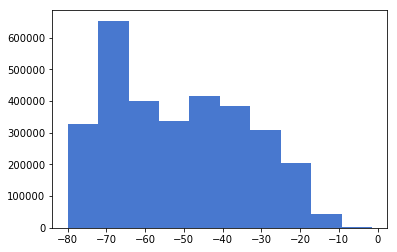

In [21]:
plt.hist(Y_dB[b], bins=10)

In [22]:
def defineIndex(x):
    if x < -70:
        return 0
    elif x < -60:
        return 1
    elif x < -50:
        return 2
    elif x < -40:
        return 3
    elif x < -30:
        return 4
    elif x < -20:
        return 5
    elif x < -10:
        return 6
    else:
        return 7

In [23]:
contadorVizinhanca = np.zeros((10,10))
contadorVizinhancaSinal = np.zeros((10,10))

In [24]:
for i in range(1, Y_dB.shape[0]-1):
    for j in range(1, Y_dB.shape[1]-1):
        
        indice = defineIndex(Y_dB[i,j])
        
        if excel[i,j] == 9000:
            contadorVizinhancaSinal[indice, defineIndex(Y_dB[i,j-1])] += 1
            contadorVizinhancaSinal[indice, defineIndex(Y_dB[i,j+1])] += 1
            contadorVizinhancaSinal[indice, defineIndex(Y_dB[i-1,j-1])] += 1
            contadorVizinhancaSinal[indice, defineIndex(Y_dB[i+1,j-1])] += 1
            contadorVizinhancaSinal[indice, defineIndex(Y_dB[i-1,j])] += 1
            contadorVizinhancaSinal[indice, defineIndex(Y_dB[i+1,j])] += 1
            contadorVizinhancaSinal[indice, defineIndex(Y_dB[i-1,j+1])] += 1
            contadorVizinhancaSinal[indice, defineIndex(Y_dB[i+1,j+1])] += 1
        
        else:
            contadorVizinhanca[indice, defineIndex(Y_dB[i,j-1])] += 1
            contadorVizinhanca[indice, defineIndex(Y_dB[i,j+1])] += 1
            contadorVizinhanca[indice, defineIndex(Y_dB[i-1,j-1])] += 1
            contadorVizinhanca[indice, defineIndex(Y_dB[i+1,j-1])] += 1
            contadorVizinhanca[indice, defineIndex(Y_dB[i-1,j])] += 1
            contadorVizinhanca[indice, defineIndex(Y_dB[i+1,j])] += 1
            contadorVizinhanca[indice, defineIndex(Y_dB[i-1,j+1])] += 1
            contadorVizinhanca[indice, defineIndex(Y_dB[i+1,j+1])] += 1

In [25]:
contadorVizinhanca

array([[  2.29149000e+06,   1.46711900e+06,   6.28200000e+04,
          8.34600000e+03,   9.31000000e+02,   5.80000000e+01,
          4.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  1.46776000e+06,   3.90305100e+06,   5.97114000e+05,
          7.39550000e+04,   7.71300000e+03,   6.37000000e+02,
          3.40000000e+01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  6.43070000e+04,   5.97930000e+05,   1.83252900e+06,
          7.36146000e+05,   7.65610000e+04,   6.13700000e+03,
          2.78000000e+02,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  8.72500000e+03,   7.45000000e+04,   7.36512000e+05,
          2.51151600e+06,   7.72099000e+05,   6.04270000e+04,
          2.37300000e+03,   8.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  9.37000000e+02,   7.72200000e+03,   7.66020000e+04,
          7.72234000e+05,   2.21274900e+06,   6.08460000e+05,
          2.65330000e+04

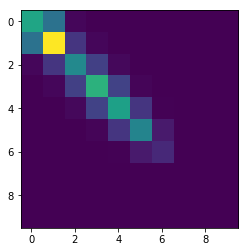

In [41]:
plt.imshow(contadorVizinhanca)

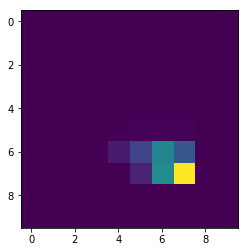

In [42]:
plt.imshow(contadorVizinhancaSinal)

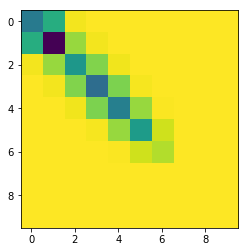

In [46]:
plt.imshow(contadorVizinhancaSinal - contadorVizinhanca)